# Import Essential packages

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# Explore Dataset

In [60]:
df = pd.read_csv('/kaggle/input/bank-data/bank-data/bank-full.csv', sep=";")

print("DataFrame Info:\n")
print(df.info())

print("\n\n\nFirst few rows of the DataFrame:\n")
print(df.head())

print("\n\n\nUnique Values in Categorical Columns:\n")
features = df.select_dtypes(include=['object', 'bool']).columns.values
for feature in features: 
    print(df[feature].value_counts(), "\n\n")
print(df.nunique(axis=1))

DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None



First few rows of the DataFrame:

   age           job  marital  education

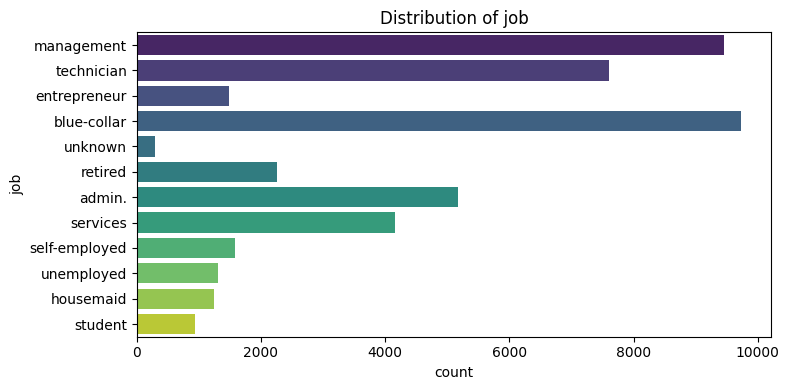

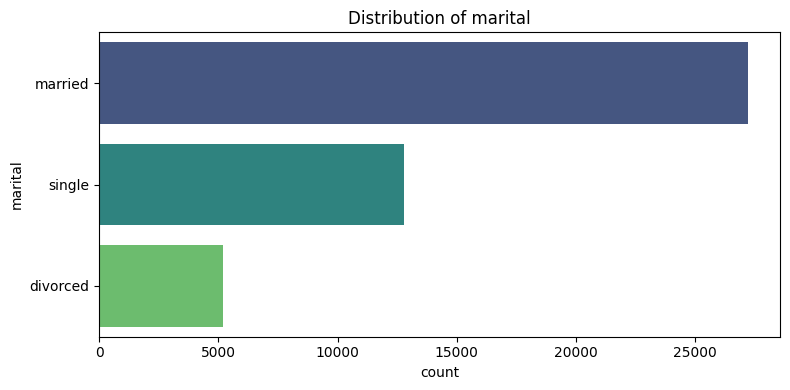

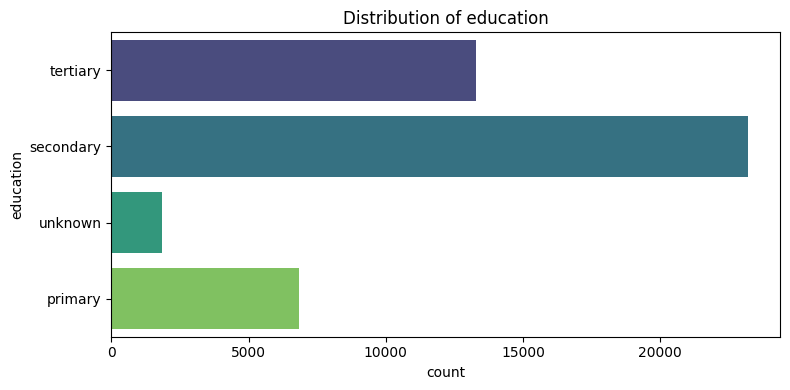

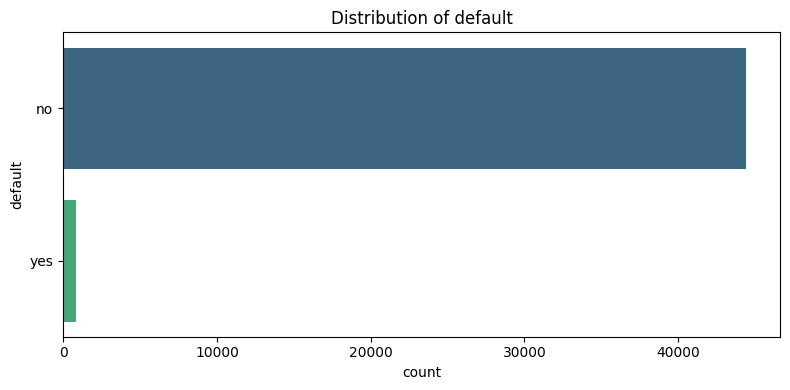

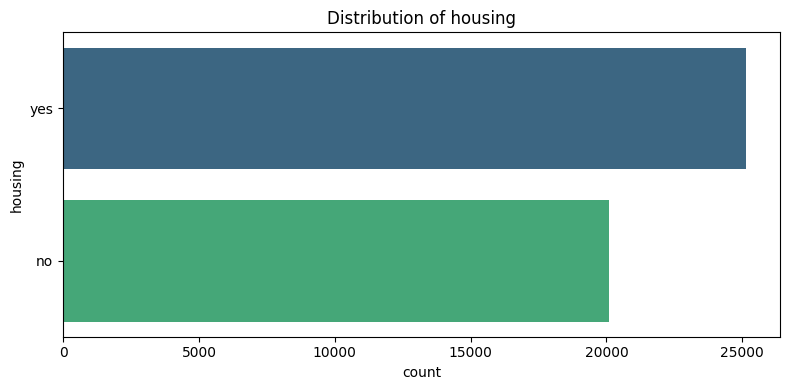

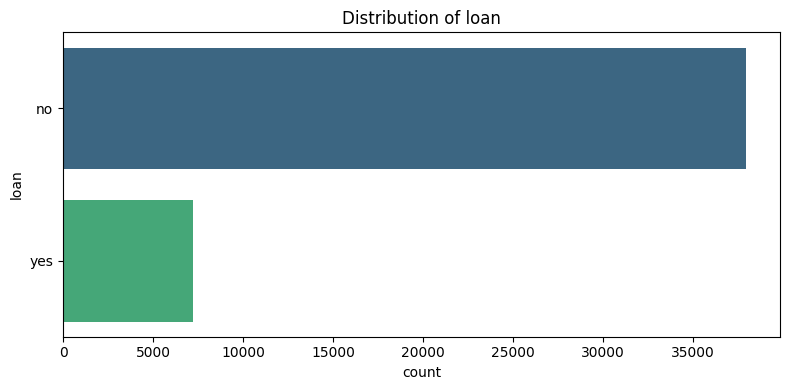

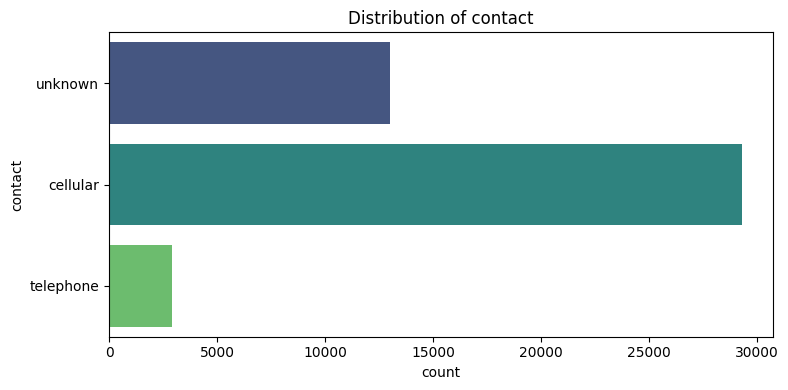

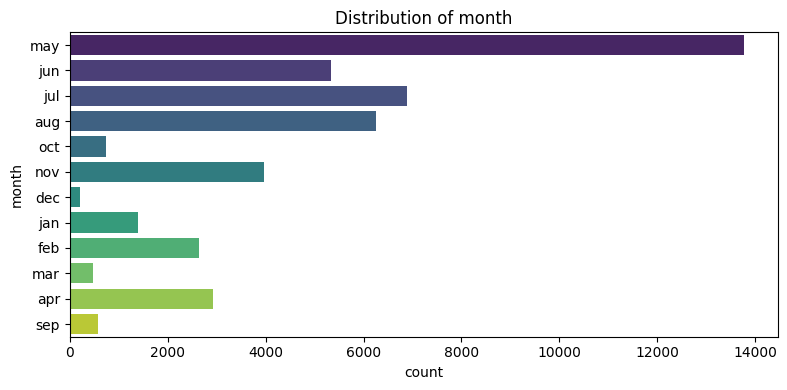

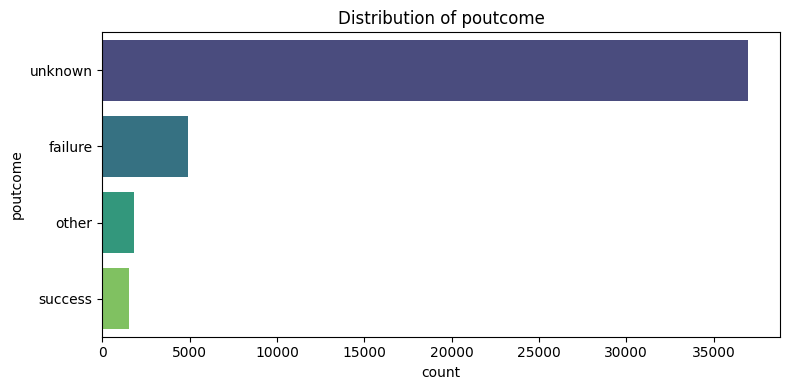

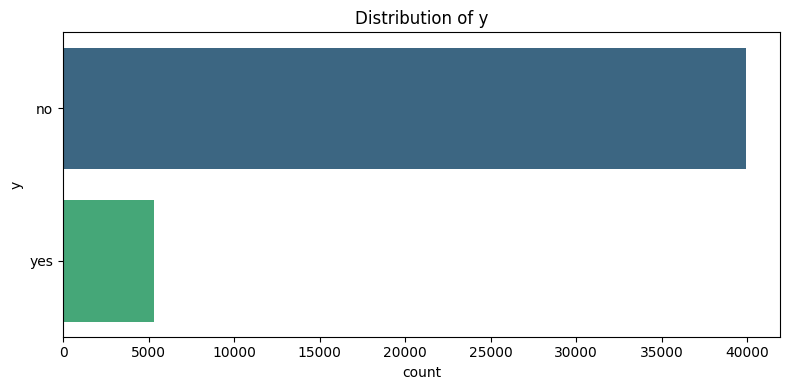

In [61]:
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[feature], palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

# Prepare Dataset

## Map No to 0 and Yes to 1 

In [62]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

X = df.drop('y', axis=1)
y = df['y']

## Split dataset into training and testing datasets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

print("Train dataset: ", X_train.shape)
print("Test dataset: ", X_test.shape)

Train dataset:  (31647, 16)
Test dataset:  (13564, 16)


## Identify numeric and categorical features

In [64]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

# Train Model

## Creating Preprocessor

In [65]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

## Model Fitting

In [66]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

training = model.fit(X_train, y_train)

print("Training Score:", training.score(X_train, y_train))

Training Score: 0.9009384775808134


# Model Prediction with Test data

In [67]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.90


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12025
           1       0.64      0.35      0.45      1539

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



## Confusion Matrix

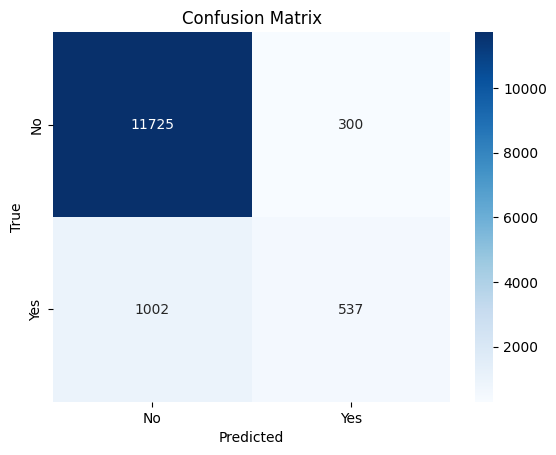

In [68]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

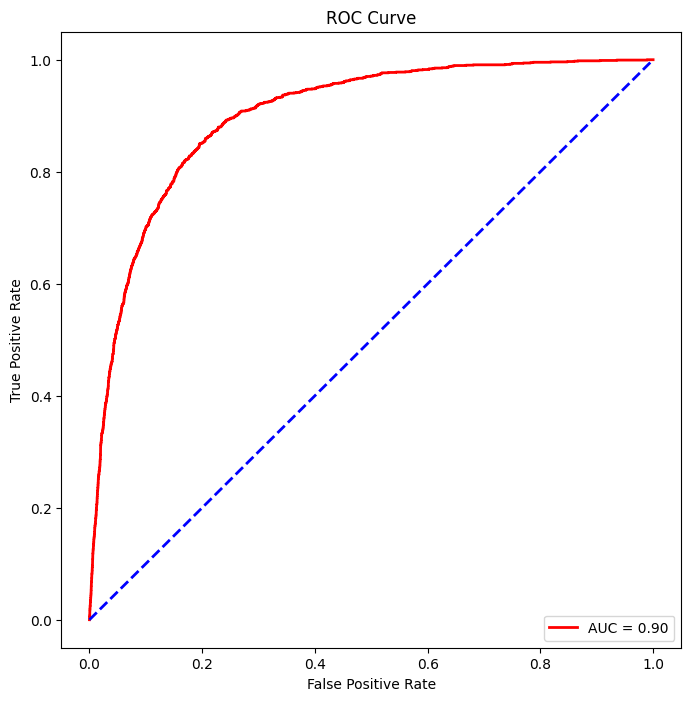

In [69]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()